In [391]:
import csv
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random

%matplotlib inline

# Preprocessing

In [392]:
columns = ['Station', 'Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
           'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
           'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
           'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
           'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']  

In [393]:
os.chdir("C:\\Users\\Kelvin\\jupyter nb\\climate analysis")

for folder in os.listdir("data"):
    globals()[folder] = pd.DataFrame()
    
    for file in os.listdir("data/{}".format(folder)):
        with open("C:\\Users\\Kelvin\\jupyter nb\\climate analysis\\data\\{}\\{}".format(folder, file)) as file_:
            csv_reader = csv.reader(file_, delimiter=",")
            temp = pd.DataFrame([_ for _ in csv_reader])
            
            temp.drop(0, axis=0, inplace=True)
            temp.columns = columns
            
            globals()[folder] = globals()[folder].append(temp)
            

In [394]:
changi.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
1,Changi,2014,1,1,0,0,0,0,26.7,29,24.9,10,29.9
2,Changi,2014,1,2,0,0,0,0,27.4,30.9,25,11.9,36
3,Changi,2014,1,3,0,0,0,0,27.1,30.4,24.9,9.7,33.1
4,Changi,2014,1,4,0,0,0,0,27.1,31.1,24.9,6.4,25.9
5,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6


### Convert numerical string to float

In [395]:
numeric_features = ['Year', 'Month', 'Day', 'Daily Rainfall Total (mm)',
                    'Highest 30 min Rainfall (mm)', 'Highest 60 min Rainfall (mm)',
                    'Highest 120 min Rainfall (mm)', 'Mean Temperature (°C)',
                    'Maximum Temperature (°C)', 'Minimum Temperature (°C)',
                    'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']  

changi["Date"] = changi[['Year', 'Month', 'Day']].agg('-'.join, axis=1)
changi = changi.reset_index().drop("index", axis=1)
changi.replace(['—', '-'] , np.nan, inplace=True)
changi[numeric_features] = changi[numeric_features].apply(pd.to_numeric)


### Fill in missing values

In [396]:
changi.isnull().sum()

Station                           0
Year                              0
Month                             0
Day                               0
Daily Rainfall Total (mm)         0
Highest 30 min Rainfall (mm)      5
Highest 60 min Rainfall (mm)      7
Highest 120 min Rainfall (mm)     7
Mean Temperature (°C)             0
Maximum Temperature (°C)          0
Minimum Temperature (°C)          0
Mean Wind Speed (km/h)            5
Max Wind Speed (km/h)            12
Date                              0
dtype: int64

In [397]:
changi["Mean Wind Speed (km/h)"].fillna(changi["Mean Wind Speed (km/h)"]
                                        .median(), inplace=True)
changi["Max Wind Speed (km/h)"].fillna(changi["Max Wind Speed (km/h)"]
                                        .median(), inplace=True)

changi["Highest 30 min Rainfall (mm)"].fillna(changi["Highest 30 min Rainfall (mm)"]
                                        .median(), inplace=True)
changi["Highest 60 min Rainfall (mm)"].fillna(changi["Highest 60 min Rainfall (mm)"]
                                        .median(), inplace=True)
changi["Highest 120 min Rainfall (mm)"].fillna(changi["Highest 120 min Rainfall (mm)"]
                                        .median(), inplace=True)


### Add "Rained" Feature
According to the [Meteorological Service Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/) ("Rainfall" section)
, a day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.


In [398]:
changi["Rained"] = changi["Daily Rainfall Total (mm)"] >= 0.2

## Data visualisation

In [399]:
sns.set_palette("ocean")

In [400]:
sample = changi.sample(500)
sample.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date,Rained
2452,Changi,2020,9,18,0.0,0.0,0.0,0.0,29.0,32.5,26.5,11.5,33.3,2020-9-18,False
458,Changi,2015,4,4,0.0,0.0,0.0,0.0,28.9,33.2,25.8,10.3,31.3,2015-4-4,False
2447,Changi,2020,9,13,17.0,4.2,6.6,10.4,25.0,27.6,22.7,6.9,57.4,2020-9-13,True
298,Changi,2014,10,26,0.0,0.0,0.0,0.0,29.4,33.1,26.9,10.6,35.3,2014-10-26,False
2359,Changi,2020,6,17,5.4,3.0,4.0,4.2,27.1,29.6,25.5,5.0,27.8,2020-6-17,True


#### Correlation between features

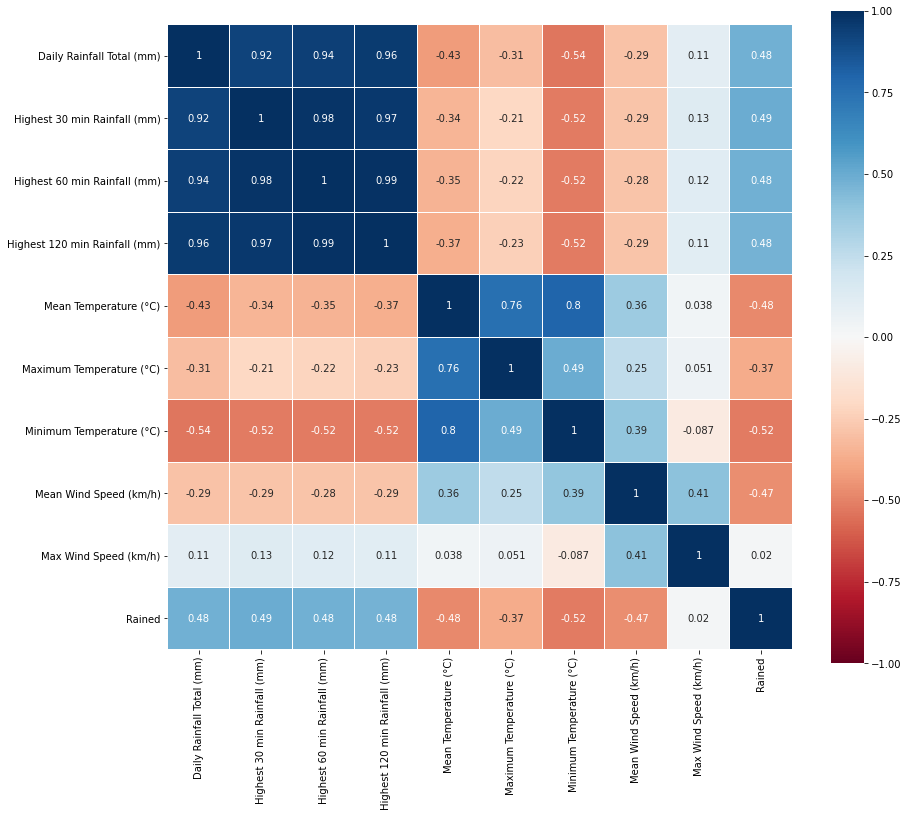

In [402]:
idx = pd.IndexSlice

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(changi.loc[idx[:], idx["Daily Rainfall Total (mm)":]].corr(), 
            ax=ax, square=True, cmap="RdBu", linecolor="white", 
            linewidths=0.1, vmin=-1, annot=True);

In [407]:
sns.set_palette("pastel")

#### Rainfall, Mean Wind Speed, and Temperature

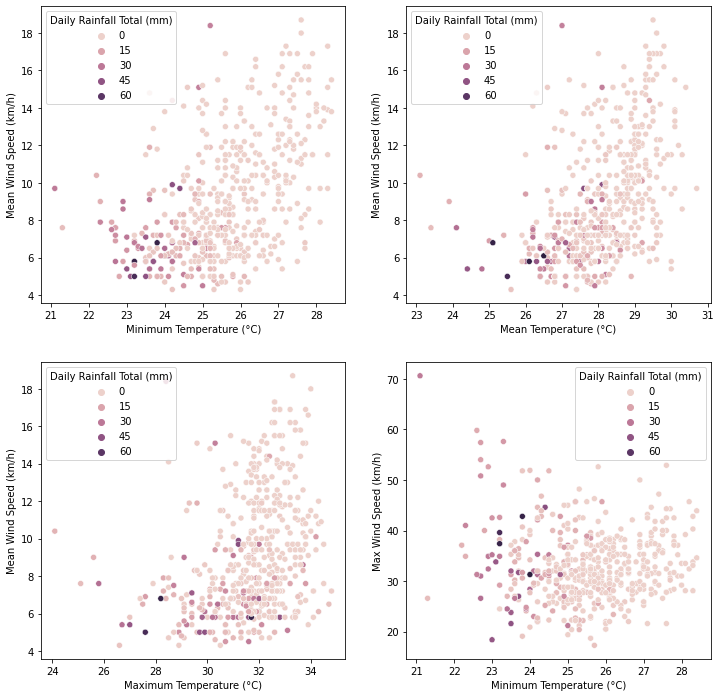

In [405]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(ax=ax[0, 0], data=sample, y="Mean Wind Speed (km/h)", 
                x="Minimum Temperature (°C)", hue="Daily Rainfall Total (mm)")

sns.scatterplot(ax=ax[0, 1], data=sample, y="Mean Wind Speed (km/h)", 
                x="Mean Temperature (°C)", hue="Daily Rainfall Total (mm)")

sns.scatterplot(ax=ax[1, 0], data=sample, y="Mean Wind Speed (km/h)", 
                x="Maximum Temperature (°C)", hue="Daily Rainfall Total (mm)")

sns.scatterplot(ax=ax[1, 1], data=sample, y="Max Wind Speed (km/h)", 
                x="Minimum Temperature (°C)", hue="Daily Rainfall Total (mm)");

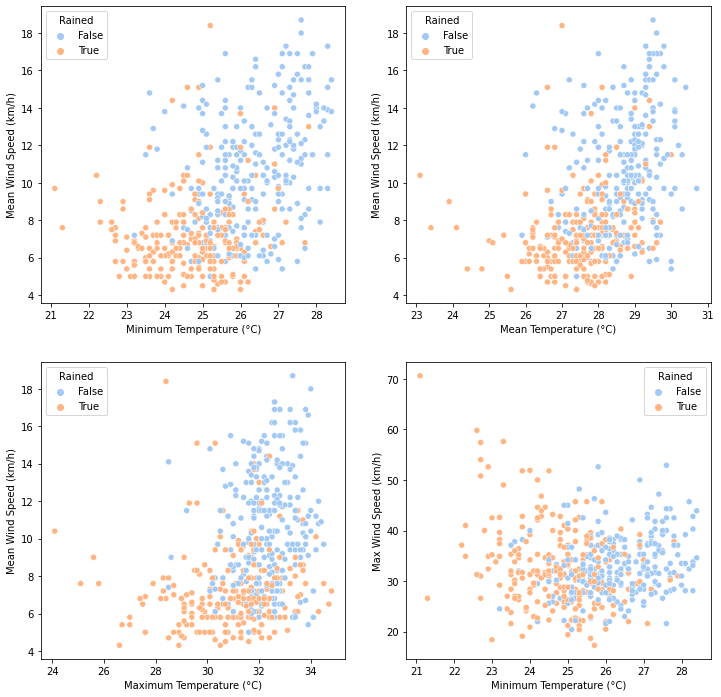

In [408]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

sns.scatterplot(ax=ax[0, 0], data=sample, y="Mean Wind Speed (km/h)", 
                x="Minimum Temperature (°C)", hue="Rained")

sns.scatterplot(ax=ax[0, 1], data=sample, y="Mean Wind Speed (km/h)", 
                x="Mean Temperature (°C)", hue="Rained")

sns.scatterplot(ax=ax[1, 0], data=sample, y="Mean Wind Speed (km/h)", 
                x="Maximum Temperature (°C)", hue="Rained")

sns.scatterplot(ax=ax[1, 1], data=sample, y="Max Wind Speed (km/h)", 
                x="Minimum Temperature (°C)", hue="Rained");

#### Changes in temperature, rainfall and wind to time

In [409]:
sns.set_palette("ocean")

In [410]:
changi["Week"] = (30*(changi["Month"]-1) + changi["Day"]) // 7 + 1
changi.head()

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date,Rained,Week
0,Changi,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-1-1,False,1
1,Changi,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-1-2,False,1
2,Changi,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1,2014-1-3,False,1
3,Changi,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9,2014-1-4,False,1
4,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6,2014-1-5,True,1


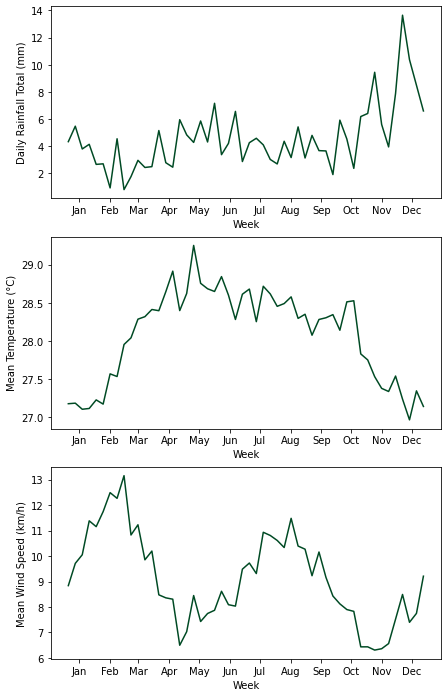

In [411]:
fig, ax = plt.subplots(3, figsize=(7, 12))

for axis in ax.flatten():
    axis.set_xticks((np.cumsum([0, 31, 29, 31, 30, 31, 30, 31,
                          31, 30, 31, 30])/7) + 2.5)
    axis.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])


rain = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Daily Rainfall Total (mm)"].mean())
sns.lineplot(ax=ax[0], data=rain, x="Week", y="Daily Rainfall Total (mm)");
    
temp = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Mean Temperature (°C)"].mean())
sns.lineplot(ax=ax[1], data=temp, x="Week", y="Mean Temperature (°C)");

wind = pd.DataFrame(changi.groupby("Week", as_index=False)
                    ["Mean Wind Speed (km/h)"].mean())
sns.lineplot(ax=ax[2], data=wind, x="Week", y="Mean Wind Speed (km/h)");


## Feature Engineering

In [412]:
sns.set_palette("pastel")

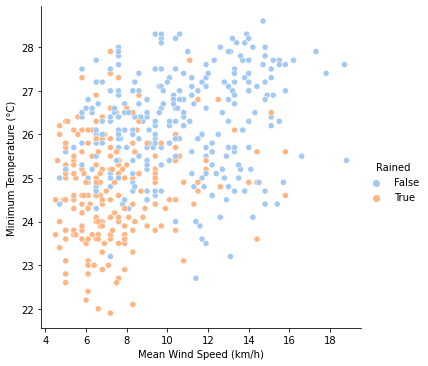

In [417]:
sns.relplot(data=changi.sample(500), x="Mean Wind Speed (km/h)",
            y="Minimum Temperature (°C)", hue="Rained");

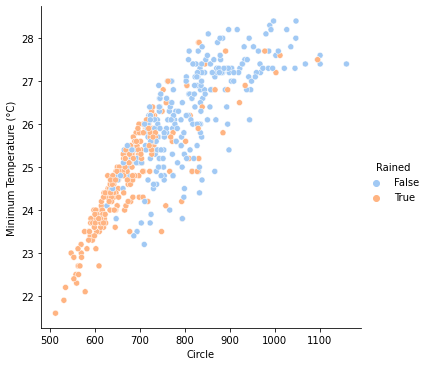

In [418]:
changi["Circle"] = changi["Mean Wind Speed (km/h)"]**2 + changi["Minimum Temperature (°C)"]**2
sns.relplot(data=changi.sample(500), x="Circle", 
            y="Minimum Temperature (°C)", hue="Rained");

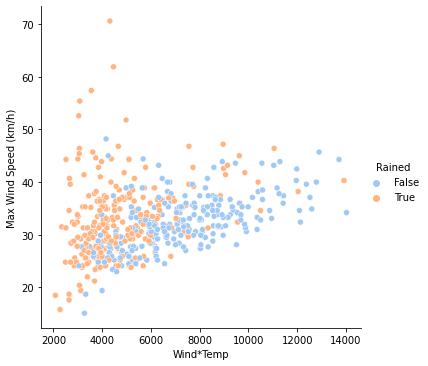

In [415]:
changi["Wind*Temp"] = changi["Mean Wind Speed (km/h)"] * changi["Minimum Temperature (°C)"]**2
sns.relplot(data=changi.sample(500), x="Wind*Temp", 
            y="Max Wind Speed (km/h)", hue="Rained");

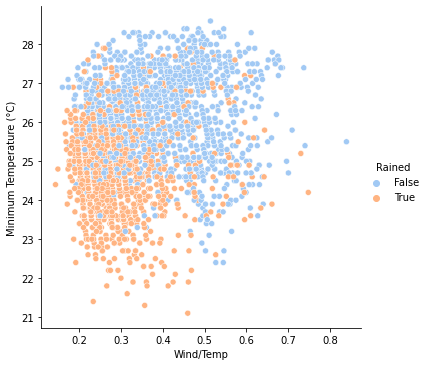

In [416]:
changi["Wind/Temp"] = changi["Mean Wind Speed (km/h)"] / changi["Minimum Temperature (°C)"]
sns.relplot(data=changi, x="Wind/Temp", y="Minimum Temperature (°C)",  hue="Rained");

## Model

In [372]:
X = changi[['Week', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', "Max Wind Speed (km/h)", 'Circle', "Wind/Temp", "Wind*Temp"]]  
y = changi["Rained"]

In [373]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, normalize
from sklearn.pipeline import make_pipeline

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))

X = pd.DataFrame(normalize(X, axis=0))
X.columns = ['Week', 'Minimum Temperature (°C)', 'Mean Wind Speed (km/h)', 
             "Max Wind Speed (km/h)", 'Circle', "Wind/Temp", "Wind*Temp"]

X


,Week,Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Circle,Wind/Temp,Wind*Temp
0,0.000000,0.016199,0.020056,0.015501,0.016409,0.021208,0.017591
1,0.000000,0.016625,0.025918,0.021890,0.019635,0.027319,0.022879
2,0.000000,0.016199,0.019130,0.018853,0.016000,0.020218,0.016796
3,0.000000,0.016199,0.008948,0.011312,0.012322,0.009331,0.008052
4,0.000000,0.009378,0.010182,0.010997,0.007349,0.012191,0.006871
...,...,...,...,...,...,...,...
2552,0.034188,0.012789,0.018205,0.013302,0.012890,0.020258,0.014427
2553,0.034188,0.020888,0.027770,0.021052,0.024179,0.027711,0.027206
2554,0.034188,0.016199,0.007714,0.011312,0.011979,0.008011,0.006993
2555,0.034188,0.017051,0.020364,0.019062,0.017241,0.021272,0.018288


In [374]:
changi

,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h),Date,Week,Rained,Circle,Wind*Temp,Wind/Temp
0,Changi,2014,1,1,0.0,0.0,0.0,0.0,26.7,29.0,24.9,10.0,29.9,2014-1-1,1,False,720.01,6200.100,0.401606
1,Changi,2014,1,2,0.0,0.0,0.0,0.0,27.4,30.9,25.0,11.9,36.0,2014-1-2,1,False,766.61,7437.500,0.476000
2,Changi,2014,1,3,0.0,0.0,0.0,0.0,27.1,30.4,24.9,9.7,33.1,2014-1-3,1,False,714.10,6014.097,0.389558
3,Changi,2014,1,4,0.0,0.0,0.0,0.0,27.1,31.1,24.9,6.4,25.9,2014-1-4,1,False,660.97,3968.064,0.257028
4,Changi,2014,1,5,18.4,8.6,10.8,15.4,24.8,26.4,23.3,6.8,25.6,2014-1-5,1,True,589.13,3691.652,0.291845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,Changi,2020,12,27,2.2,2.0,2.2,2.2,27.2,31.8,24.1,9.4,27.8,2020-12-27,52,True,669.17,5459.614,0.390041
2553,Changi,2020,12,28,0.0,0.0,0.0,0.0,28.1,31.7,26.0,12.5,35.2,2020-12-28,52,False,832.25,8450.000,0.480769
2554,Changi,2020,12,29,3.2,2.6,2.6,2.6,26.6,30.3,24.9,6.0,25.9,2020-12-29,52,True,656.01,3720.060,0.240964
2555,Changi,2020,12,30,0.0,0.0,0.0,0.0,27.8,31.8,25.1,10.1,33.3,2020-12-30,52,False,732.02,6363.101,0.402390


In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [376]:
from sklearn.linear_model import LogisticRegression
logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)
logr_model.score(X_test, y_test)

0.571875

In [377]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_model.score(X_test, y_test)

0.7703125

In [378]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", C=10000)
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

0.796875

In [379]:
print("degree", "score")
for degree in np.arange(6):
    score = SVC(kernel="poly", degree=degree).fit(X_train, y_train).score(X_test, y_test)
    print(str(degree) + "         " + str(score))

degree score
0         0.5515625
1         0.8
2         0.8171875
3         0.8265625
4         0.828125
5         0.8203125


In [380]:
SVC(kernel="rbf", C=100).fit(X_train, y_train).score(X_test, y_test)

0.80625

In [381]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.7796875

In [382]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_model.score(X_test, y_test)

0.7546875

In [383]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
dtree_model.score(X_test, y_test)

0.7296875

In [384]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=15)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)

0.7890625